# El problema de la mochila

Se tiene una mochila y un conjunto de artículos con diferente peso y valor. Se intenta determinar que artículos se pueden colocar adentro de la mochila de manera que no se sobrepase el límite de peso de la mochila maximizando el valor total. 

Resolver el problema para los siguientes artículos y un límite de 30kg:

<table style="font-size:16px">
    <tr>
        <th>Item</th><td>Valor</td><td>Peso</td>
    </tr>
    <tr>
        <th>A</th><td>4</td><td>12</td>
    </tr>
    <tr>
        <th>B</th><td>2</td><td>2</td>
    </tr>
    <tr>
        <th>C</th><td>10</td><td>4</td>
    </tr>
    <tr>
        <th>D</th><td>1</td><td>1</td>
    </tr>
    <tr>
        <th>E</th><td>5</td><td>15</td>
    </tr>
    <tr>
        <th>F</th><td>3</td><td>2</td>
    </tr>
    <tr>
        <th>G</th><td>14</td><td>7</td>
    </tr>
    <tr>
        <th>H</th><td>4</td><td>10</td>
    </tr>
</table>

## Codificación

- Definir como se codificará el problema

El problema se codificara como una lista, donde cada posición indicará un elemento (0 = A, 1 = B, ...etc) y el valor de cada posición sera un numero entre 0 y 1, indicando si ese elemento se encuentra en la mochila o no

 ### Carga de datos

In [1]:
import numpy
import matplotlib.pyplot as plt
import json
import random

with open("backpack.json", "r") as fd:
    backpack_items = json.loads(fd.read())

### Crear combinaciones de items

In [2]:
def calculate_weight(combination: list) -> int:
    weight = 0
    for index, item in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']):
        if not combination[index]:
            continue
        weight += backpack_items[item]['weight']
    return weight


def calculate_value(combination: list) -> list:
    value = 0
    for index, item in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']):
        if not combination[index]:
            continue
        value += backpack_items[item]['value']
    return value


def create_population(size: int) -> list:
    return [list(numpy.random.randint(low=0, high=2, size=(8))) for i in range(size)]

## Adaptación

- Definir como se calculará la adaptación de un individuo
    La adaptación será dando el puntaje de el valor de la mochila de cada individuo, siempre y cuando el peso sea menor a 30
- ¿Existen estados que deben ser penalizados?
    Si, en caso de que el peso sea mayor a 30, se asignará un valor de adaptación negativo, indicando que tanto se excede de 30


In [3]:
def adaptation_function(population: list) -> list:
    adapted_population = []
    for bag in population:
        weight = calculate_weight(bag)
        value = calculate_value(bag)
        if weight > 30:
            adapted_population.append(30 - weight)
        else:
            adapted_population.append(value)
    return adapted_population

## Selección

### Justificación elección de seleccion por torneo:

**Respuesta:**

In [4]:
def tournament_selection(adapted_pop: list, fitness: list) -> list:
    """Recibe los valores de la poblacion adaptada junto con la combinación y ordena la combinacion con el rank"""
    best_4 = []
    for index in (0, 2, 4, 6):
        if adapted_pop[index] > adapted_pop[index + 1]:
            best_4.append(fitness[index])
        else:
            best_4.append(fitness[index + 1])
    return best_4

## Cruza

In [5]:
def crossover(parents: list) -> list:
    children = []
    for p1, p2 in ((0, 3), (1, 2)):
        parent_1 = parents[p1]
        parent_2 = parents[p2]
        child_1 = [
            parent_1[0],
            parent_1[1],
            parent_2[2],
            parent_2[3],
            parent_1[4],
            parent_1[5],
            parent_2[6],
            parent_2[7]
        ]
        child_2 = [
            parent_2[0],
            parent_2[1],
            parent_1[2],
            parent_1[3],
            parent_2[4],
            parent_2[5],
            parent_1[6],
            parent_1[7]
        ]
        children.append(child_1)
        children.append(child_2)
    return children

## Mutación

In [6]:
def mutate(children: list):
    mut_prob = 0.77
    for child in children:
        should_mutate = round(random.uniform(0, 1), 2) < mut_prob
        if not should_mutate:
            continue
        index_to_mutate = random.choice(list(range(8)))
        child[index_to_mutate] = abs(child[index_to_mutate] - 1)

# Algoritmo

In [7]:
best_values = []
generation = []
population = create_population(8)
for i in range(400):
    adapted_population = adaptation_function(population)
    parents = tournament_selection(adapted_population, population)
    children = crossover(parents)
    mutate(children)
    new_population = children
    new_population.extend(parents)
    best_value = max(adaptation_function(new_population))
    best_values.append(best_value)
    generation.append(i)
    population = new_population

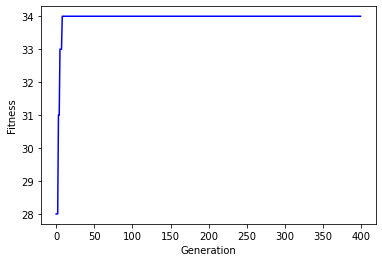

In [8]:
fig, ax = plt.subplots()
ax.plot(generation, best_values, 'b')
ax.set_ylabel('Fitness')
ax.set_xlabel('Generation')
plt.show()